## 預試資料內容: 話題版

In [1]:
#匯入套件
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt  

### [匯入資料]

In [2]:
#存成utf8_sig格式的csv檔
#artical_0901_1115school.to_csv("artical_0901_1115school.csv", encoding = "utf_8_sig")
#artical_0901_1115topic.to_csv("artical_0901_1115topic.csv", encoding = "utf_8_sig")
# 讀入 csv 文字檔
csv_file = "artical_0901_1115topic.csv"
input_artical = pd.read_csv(csv_file) 
print(input_artical.shape)
input_artical.head()

(283628, 11)


,Unnamed: 0,id,content,createdAt,commentCount,forumName,forumAlias,school,gender,school_revised,ISschool
0,0,231979739.0,雖然是和平分手 但是 我還是沒辦法放下妳\n分開後的一個月多 許多晚上都會夢到你\n我還記得...,2019-09-01 00:00:43.168,1.0,感情,relationship,台南應用科技大學,M,台南應用科大,False
1,1,231979740.0,遇到鬧事的人\n沒有上新聞\n我失去爆紅ㄉ機會惹ฅ( ￣ ۝ ￣ )ฅ,2019-09-01 00:02:08.991,0.0,廢文,whysoserious,懶蟲蟲(ﾟ∀。),M,其他,False
2,2,231979741.0,中國人啃了展示用超大顆松露一大口\n\n還說不知道那是展示用的,2019-09-01 00:02:40.197,2.0,廢文,whysoserious,E.coli,M,其他,False
3,3,231979743.0,不斷的\n啃咬、咀嚼\n腦裡的\n剩\n軟爛的泥\n和\n幾個\n咬不爛的\n碎末\n\n仍...,2019-09-01 00:05:27.739,0.0,詩文,literature,L.,F,其他,False
4,4,231979744.0,https://youtu.be/i7syPKahNfs,2019-09-01 00:05:34.495,0.0,廢文,whysoserious,晾衣服信封心得 點心小卡,F,其他,False


### [話題版] 留言數量

In [3]:
#估算留言量
commentCounts = pd.DataFrame()
commentCounts = input_artical['commentCount'].value_counts() 
commentCounts.to_excel("004_commentCounts.xlsx")
commentCounts

0.0       56131
1.0       29718
2.0       29621
3.0       22850
4.0       19801
5.0       15761
6.0       13440
7.0       10801
8.0        9265
9.0        7564
10.0       6666
11.0       5719
12.0       5082
13.0       4329
14.0       3942
15.0       3256
16.0       2943
17.0       2606
18.0       2327
19.0       1964
20.0       1742
21.0       1692
22.0       1529
23.0       1338
24.0       1212
25.0       1126
26.0        981
27.0        920
28.0        894
29.0        832
          ...  
936.0         1
797.0         1
992.0         1
795.0         1
310.0         1
1299.0        1
976.0         1
651.0         1
653.0         1
390.0         1
600.0         1
3215.0        1
812.0         1
544.0         1
2240.0        1
1643.0        1
1260.0        1
1642.0        1
1262.0        1
826.0         1
583.0         1
1633.0        1
2531.0        1
1267.0        1
490.0         1
407.0         1
813.0         1
1636.0        1
416.0         1
1023.0        1
Name: commentCount, Leng

count    283628.000000
mean         10.994161
std          53.793241
min           0.000000
25%           1.000000
50%           4.000000
75%           9.000000
max       10533.000000
Name: commentCount, dtype: float64


Text(0.5, 0, 'commentCount')

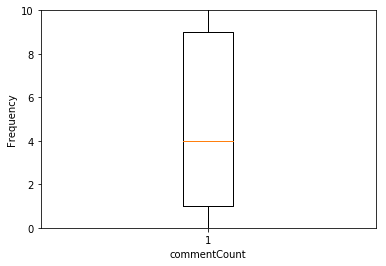

In [4]:
print(input_artical['commentCount'].describe())
plt.boxplot(input_artical['commentCount'])
plt.ylim([0,10]) 
plt.ylabel('Frequency')
plt.xlabel('commentCount')

In [3]:
#話題版 的熱門貼文  
artical_pop = input_artical[input_artical['commentCount'] >= 4]
artical_pop = artical_pop.drop('Unnamed: 0' , axis=1)
artical_pop = artical_pop.reset_index(drop=True)
print("話題版 的熱門貼文 shape",  artical_pop.shape)

話題版 的熱門貼文 shape (145308, 10)


### [熱門貼文] 貼文時間趨勢？

In [4]:
import datetime 
artical_pop['createdAt'] = artical_pop['createdAt'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

In [5]:
#artical_pop['date_delta']= (artical_pop['createdAt']-datetime.datetime(2019, 9, 1))
#artical_pop['date_delta_group']=(artical_pop['date_delta']/15).dt.days
#artical_pop[['createdAt', 'date_delta', 'date_delta_group']]
artical_pop.loc[(datetime.datetime(2019, 9, 1)<=artical_pop['createdAt']) & (artical_pop['createdAt']< datetime.datetime(2019, 9, 16)), 'date_group'] = "0 9月上旬"
artical_pop.loc[(datetime.datetime(2019, 9, 16)<=artical_pop['createdAt']) & (artical_pop['createdAt']< datetime.datetime(2019, 10, 1)), 'date_group'] = "1 9月下旬"
artical_pop.loc[(datetime.datetime(2019, 10, 1)<=artical_pop['createdAt']) & (artical_pop['createdAt']< datetime.datetime(2019, 10, 16)), 'date_group'] = "2 10月上旬"
artical_pop.loc[(datetime.datetime(2019, 10, 16)<=artical_pop['createdAt']) & (artical_pop['createdAt']< datetime.datetime(2019, 11, 1)), 'date_group'] = "3 10月下旬"
artical_pop.loc[(datetime.datetime(2019, 11, 1)<=artical_pop['createdAt']) & (artical_pop['createdAt']< datetime.datetime(2019, 11, 16)), 'date_group'] = "4 11月上旬"
artical_pop[['createdAt', 'date_group']]

,createdAt,date_group
0,2019-09-01 00:10:36.698,0 9月上旬
1,2019-09-01 00:12:08.937,0 9月上旬
2,2019-09-01 00:13:13.991,0 9月上旬
3,2019-09-01 00:16:03.215,0 9月上旬
4,2019-09-01 00:16:06.628,0 9月上旬
5,2019-09-01 00:23:31.848,0 9月上旬
6,2019-09-01 00:27:28.185,0 9月上旬
7,2019-09-01 00:30:51.092,0 9月上旬
8,2019-09-01 00:32:18.798,0 9月上旬
9,2019-09-01 00:36:04.866,0 9月上旬


In [6]:
date_group_counts = artical_pop['date_group'].value_counts()
date_group_counts.to_excel("004_date_group_counts.xlsx")
print(date_group_counts.shape, "表示有多 半個月(15天)")
date_group_counts

(5,) 表示有多 半個月(15天)


3 10月下旬    30645
2 10月上旬    29824
0 9月上旬     28979
4 11月上旬    28157
1 9月下旬     27703
Name: date_group, dtype: int64

### [熱門貼文] 貼文是哪些版群？

In [9]:
forumName_counts = artical_pop['forumName'].value_counts()
forumName_counts.to_excel("004_forumName_counts.xlsx")
print(forumName_counts.shape, "表示有多少版群")
forumName_counts

(180,) 表示有多少版群


廢文          52037
感情           9813
心情           7175
美妝           5396
時事           4757
西斯           4124
閒聊           3952
星座           3671
3C           3252
彩虹           3012
有趣           2510
汽機車          2350
工作           2152
考試           2120
女孩           2097
追星           2038
寵物           2028
穿搭           1951
美食           1680
遊戲           1440
旅遊           1369
網路購物         1254
動漫           1072
健身            940
戲劇綜藝          855
靈異            852
攝影            717
理財            677
美髮            676
港澳日常          665
            ...  
排球             14
香港中文大學         13
爐石戰記           11
柯南             11
創客             10
行動支付            9
舞蹈              9
管樂              9
桌球              7
樂高              7
中職              7
漫威              7
建築              7
量販店             7
航海王             6
前端工程師           6
災害回報            5
科學              5
麥可傑克森           5
畢業季             3
芳療              3
香港公開大學          2
官方公告            2
香港科技大學          2
港澳二手物品交流  

In [12]:
forumName_datecounts = artical_pop.groupby(by = 'date_group')['forumName'].value_counts()
forumName_datecounts.to_excel("004_forumName_datecounts.xlsx")
print(forumName_datecounts.shape, "表示date有多少版群")
forumName_datecounts

(696,) 表示date有多少版群


date_group  forumName
0 9月上旬      廢文           11708
            感情            1843
            心情            1407
            美妝             972
            時事             799
            閒聊             749
            西斯             746
            3C             634
            星座             614
            彩虹             549
            有趣             480
            考試             460
            工作             440
            女孩             436
            汽機車            425
            寵物             396
            追星             376
            穿搭             346
            遊戲             301
            美食             283
            旅遊             257
            新生季            233
            動漫             231
            網路購物           220
            戲劇綜藝           193
            健身             179
            靈異             177
            居家生活           151
            美髮             147
            攝影             145
                         ...  
4 11月上旬     零食   

## 留言者資訊

### [熱門貼文] 貼文者性別佔比？

In [10]:
gender_counts = artical_pop['gender'].value_counts()
gender_counts.to_excel("004_gender_counts.xlsx")
print(gender_counts.shape, "表示有多少性別label")
gender_counts

(3,) 表示有多少性別label


F    88602
M    56387
D      314
Name: gender, dtype: int64

### [熱門貼文] 貼文者學校有哪些？

In [11]:
school_counts = artical_pop['school_revised'].value_counts()
school_counts.to_excel("004_school_counts.xlsx")
print(school_counts.shape, "表示有多少間學校名稱")
school_counts

(165,) 表示有多少間學校名稱


其他            64612
輔仁大學           3837
臺灣大學           3417
淡江大學           3285
逢甲大學           3255
臺灣藝術大學         1936
文化大學           1881
東吳大學           1848
成功大學           1779
銘傳大學           1636
世新大學           1580
中興大學           1521
中原大學           1415
清華大學           1290
政治大學           1282
正修科大           1252
中科大            1226
中正大學           1207
弘光科技大學         1204
師範大學           1145
東海大學           1144
東華大學           1143
輔英科技大學         1132
台科大            1014
嘉義大學           1003
臺北大學            936
屏科大             926
南臺科大            882
義守大學            856
靜宜大學            848
              ...  
經國管理暨健康學院        56
臺灣戲曲學院           56
南亞技術學院           54
中央警察大學           54
敏惠醫護管理專科學校       50
聖母醫護管理專科學校       47
國立臺南護理專科學校       47
華梵大學             44
育英醫護管理專科學校       44
中州科大             43
國防大學             40
國立體育大學           38
國防醫學院            33
臺南藝術大學           26
蘭陽技術學院           24
台灣首府大學           23
大同技術學院           18
中華民國陸軍專科學校       15
稻江科技暨管理學院        13


In [12]:
school_gendercounts = artical_pop.groupby(by = 'gender')['school_revised'].value_counts()
school_gendercounts.to_excel("004_school_gendercounts.xlsx")
print(school_gendercounts.shape, "表示有多少間學校名稱*2")
school_gendercounts

(326,) 表示有多少間學校名稱*2


gender  school_revised
D       其他                  314
F       其他                39725
        輔仁大學               3025
        淡江大學               2422
        臺灣藝術大學             1888
        逢甲大學               1559
        臺灣大學               1488
        東吳大學               1403
        世新大學               1293
        文化大學               1288
        銘傳大學               1233
        中原大學               1149
        輔英科技大學             1032
        弘光科技大學             1022
        正修科大                991
        中科大                 932
        東海大學                841
        師範大學                838
        東華大學                798
        中正大學                682
        臺北大學                606
        義守大學                600
        屏科大                 595
        靜宜大學                590
        實踐大學                551
        文藻外語大學              529
        南臺科大                525
        台南應用科大              524
        嘉南藥理大學              519
        政治大學                511
                 

###  儲存artical_pop 為永久檔

In [7]:
#存成utf8_sig格式的csv檔
artical_pop.to_csv("004_artical_pop.csv", encoding = "utf_8_sig")

In [9]:
artical_pop.shape

(145308, 11)